## 9.6 Homework
### 1, From web
- 1, dowoload the data from http://www-personal.umich.edu/~mejn/cp/data/circular.txt
- 2, using Fourier transform to process the image and figure out how to compress the data.
- 3, compare it with the size which you obtained via plt.savefig()

In [1]:
%matplotlib inline  
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft

req = urllib.request.Request('http://www-personal.umich.edu/~mejn/cp/data/circular.txt')
response = urllib.request.urlopen(req)
the_page = response.read().decode()
data = the_page
data = np.fromstring(data,sep=' ',dtype=float)

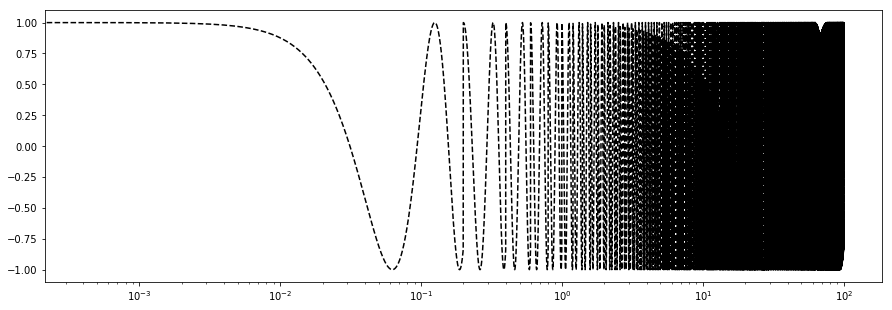

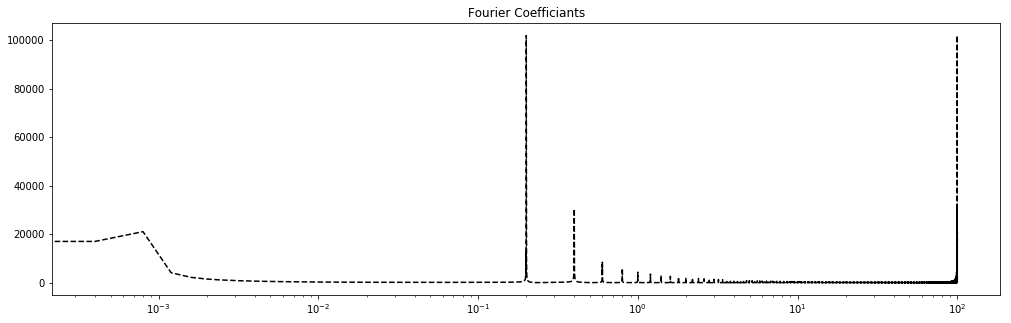

In [2]:
c = np.fft.fft(data)
x = np.linspace(0,100,np.shape(data)[0])

plt.figure(figsize=(15,5))
#plt.title('Fourier Transform')
plt.semilogx(x, data, 'k--')
plt.show()
plt.figure(figsize=(17,5))
plt.title('Fourier Coefficiants')
plt.semilogx(x,np.abs(c),'k--')
plt.show()

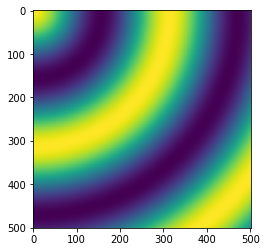

In [3]:
data1 = np.reshape(data, (501,501))
image = plt.imshow(data1)
plt.imsave('density.png',data1)

#I am unsure of what's being asked for number 3.

### 2, Choose your own data or online data to play with DFT, IDFT and fitting with different functions.

In [4]:
def idft(c):
    N = len(c)
    y = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            y[k] += c[n]*np.exp(2j*np.pi*k*n/N)
    return y

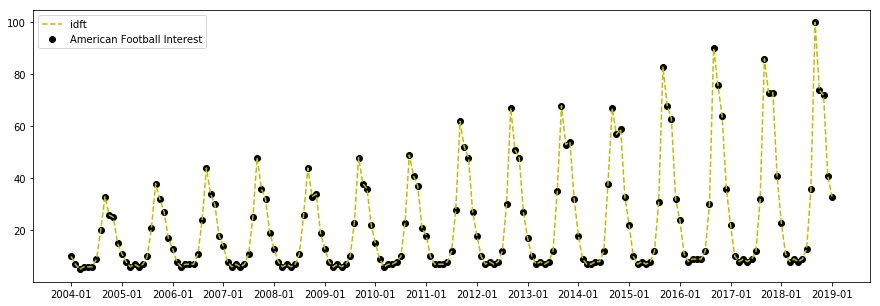

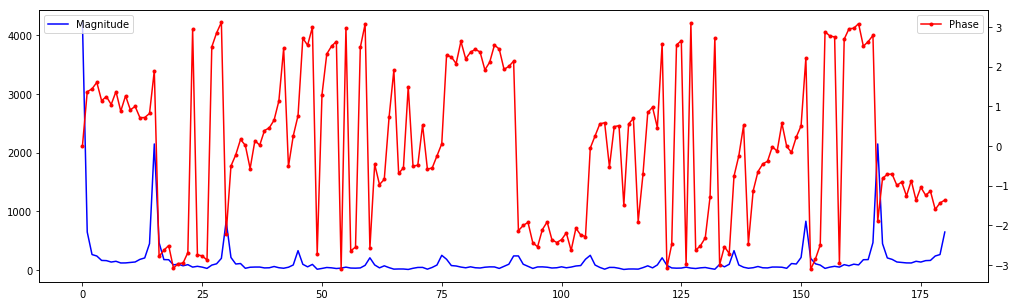

In [5]:
%matplotlib inline  

import os
import csv
import matplotlib.pyplot as plt

workdir = str(os.getcwd())

os.chdir('/Users/b_eebs/Desktop')

years = []
football = []

with open('football.csv','r') as f:
    plots = csv.reader(f, delimiter=',')
    for row in plots:
        if len(row) > 1:
            years.append(row[0])
            football.append(row[-1])

del(years[0])
del(football[0])
os.chdir(workdir)
years = np.array(years)
football = np.array([float(i) for i in football])

npoints = len(years)
cx = fft.fft(football)

frequency = 12
x = np.arange(football.shape[0])
y1 = idft(cx).real/npoints
plt.figure(figsize=[15, 5])
plt.scatter(years,football,color = 'k',label = 'American Football Interest')
plt.plot(years,y1,'y--',label = 'idft')
plt.xticks(x[::frequency], years[::frequency])
plt.legend(loc='upper left')
plt.show()

fig, ax1 = plt.subplots(figsize=[17, 5])
ax1.plot(np.abs(cx), 'b-', label='Magnitude')
ax2 = ax1.twinx()
ax2.plot(np.angle(cx), 'r.-', label='Phase')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

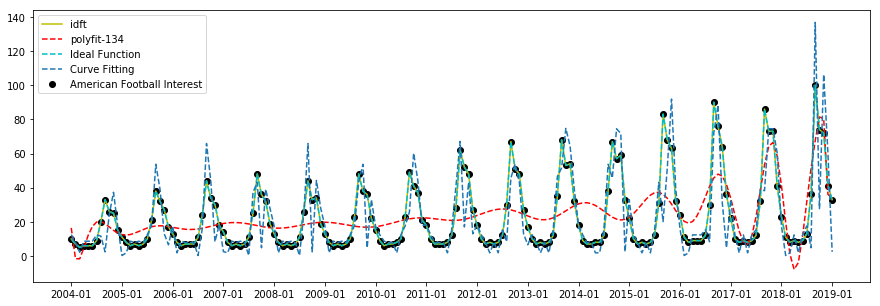

In [32]:
import warnings
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')

#for the x values, i will assign numbers from 0 to len(years) to do fittings, i.e., number of
#days the sample set consists
temp_x = np.arange(0,len(years)) 

#polyfit, which looks somewhat like the opposite of damped oscillation
for o in range(134): #highest possible value
    fit = np.polyfit(temp_x, football, o, full=True)
    y_p = np.polyval(fit[0], x)
    
#function showing sinusoidal exponential growth
f1 = lambda t: t * np.cos(2*np.pi*t) 

#curve fitting
f2 = lambda t,a: 1.5*np.abs(t*np.cos(a*t)) #I attempted to include an extra parameter, 
#b*np.abs(t*np.cos(a*t)), but didn't obtain a reasonable value for b, so I just set it to 1.5. I 
#understand that this isn't a correct practice when fitting functions to data, but I figured that
#I must have just done something incorrect/
params, extras = curve_fit(f2, temp_x, football)

frequency = 12
plt.figure(figsize=[15, 5])
plt.scatter(years,football,color = 'k',label = 'American Football Interest')
plt.plot(years,y1,'y',label = 'idft')
plt.plot(years,y_p ,'r--',label = 'polyfit-134')
plt.plot(years,f1(football),'c--',label='Ideal Function')
plt.plot(temp_x,f2(football,params[0],params[1]),'--',label = 'Curve Fitting')

plt.xticks(x[::frequency], years[::frequency])
plt.legend(loc='upper left')
plt.show()

In [ ]:
#as can be seen in the above plot, the polyfit gives the worse fit while the curve fitting gives
#the best, even though it isn't that good. the fit from the inverse dft was spot on with the data
#and the ideal function.